In [31]:
import numpy as np
import importlib as il
import matplotlib.pyplot as plt
import math
import pandas as pd
import utils as u

import classifiers as cl

%matplotlib inline

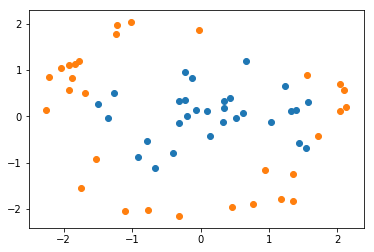

In [83]:
n1 = 30
n2 = 30
r = 2

X1 = np.random.randn(n1, 2) *0.7
theta = np.random.rand(n2) * 2*math.pi
X2 = np.random.randn(n2, 2)*0.2 +  np.stack( [ r* np.cos(theta) , r*np.sin(theta) ] , axis=-1)


plt.scatter(X1[:,0], X1[:,1]);
plt.scatter(X2[:,0], X2[:,1]);

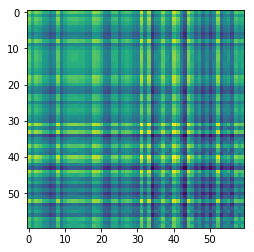

In [84]:
X = np.vstack([X1,X2]) + 10
y = np.hstack([np.ones(n1), -np.ones(n2)])
K = X@X.T
plt.imshow(K)

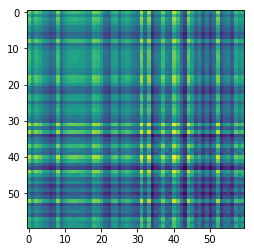

In [85]:
K2 = (K+0.1)**2
plt.imshow(K2)

In [86]:
KK = K2

In [87]:
il.reload(cl)
svm = cl.KSVM()

In [88]:
def kernel2(X,Y):
    return (X@(Y.T) +0.1)**2

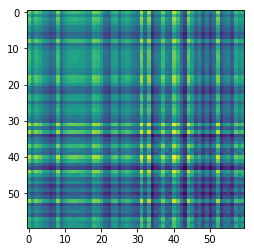

In [89]:
plt.imshow(kernel2(X,X))

In [90]:
np.linalg.matrix_rank(K)

2

In [103]:
a = svm.train(X, y, kernel2, 0.001, center =False)

(60, 1)
     pcost       dcost       gap    pres   dres
 0: -1.3496e+02 -3.3888e+03  8e+03  7e-01  4e-10
 1: -1.1751e+02 -1.0860e+03  1e+03  2e-02  4e-10
 2: -1.3900e+02 -2.6703e+02  1e+02  2e-03  4e-10
 3: -1.7298e+02 -2.2020e+02  5e+01  6e-04  4e-10
 4: -1.7960e+02 -1.9841e+02  2e+01  2e-04  4e-10
 5: -1.8262e+02 -1.9210e+02  9e+00  4e-05  5e-10
 6: -1.8559e+02 -1.8725e+02  2e+00  3e-06  5e-10
 7: -1.8615e+02 -1.8639e+02  2e-01  4e-07  5e-10
 8: -1.8624e+02 -1.8626e+02  2e-02  7e-09  5e-10
 9: -1.8625e+02 -1.8625e+02  7e-04  3e-10  5e-10
10: -1.8625e+02 -1.8625e+02  1e-05  4e-12  6e-10
Optimal solution found.


In [104]:
b = svm.train_fromK(KK, y, 0.001)

(60, 1)
     pcost       dcost       gap    pres   dres
 0: -1.3496e+02 -3.3888e+03  8e+03  7e-01  4e-10
 1: -1.1751e+02 -1.0860e+03  1e+03  2e-02  4e-10
 2: -1.3900e+02 -2.6703e+02  1e+02  2e-03  4e-10
 3: -1.7298e+02 -2.2020e+02  5e+01  6e-04  4e-10
 4: -1.7960e+02 -1.9841e+02  2e+01  2e-04  4e-10
 5: -1.8262e+02 -1.9210e+02  9e+00  4e-05  5e-10
 6: -1.8559e+02 -1.8725e+02  2e+00  3e-06  5e-10
 7: -1.8615e+02 -1.8639e+02  2e-01  4e-07  5e-10
 8: -1.8624e+02 -1.8626e+02  2e-02  7e-09  5e-10
 9: -1.8625e+02 -1.8625e+02  7e-04  3e-10  5e-10
10: -1.8625e+02 -1.8625e+02  1e-05  4e-12  6e-10
Optimal solution found.


In [92]:
ypred = svm.predict_score(X)

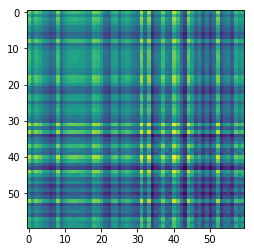

In [93]:
plt.imshow(svm.Ktrain)

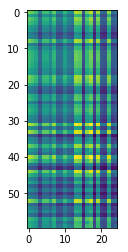

In [94]:
plt.imshow(svm.Kpred)

In [95]:
svm.support_vectors

array([ 0,  2,  3,  6, 12, 13, 17, 19, 21, 25, 27, 29, 30, 31, 33, 34, 37,
       40, 43, 44, 48, 50, 52, 53, 56])

In [96]:
s=0

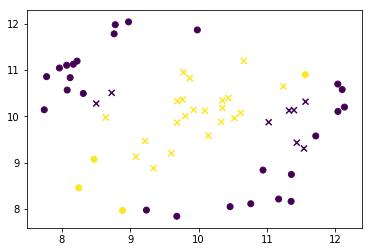

In [97]:
plt.scatter(X[:n1,0], X[:n1,1], marker = 'x' , c = ypred[:n1]>s)
plt.scatter(X[n1:,0], X[n1:,1], marker = 'o' , c = ypred[n1:]>s)

## Dataset 0 :


In [229]:
il.reload(u)

<module 'utils' from '/Users/josselinbonnevie/Documents/formation/mva/kernel_methods/Kernel_methods_challenge/utils.py'>

In [218]:
Xdf=pd.read_csv('kernel-methods-for-machine-learning-2018-2019/Xtr0.csv', sep=',')
Xtr0 = np.array(Xdf)[:,1]

Ydf=pd.read_csv('kernel-methods-for-machine-learning-2018-2019/Ytr0.csv', sep = ',')
ytr0 = np.array(Ydf)[:,1]

Xtr0.shape

(2000,)

In [219]:
Xdf=pd.read_csv('kernel-methods-for-machine-learning-2018-2019/Xte0.csv', sep=',')
Xte0 = np.array(Xdf)[:,1]
Xte0.shape

(1000,)

In [220]:
Xtrain0, ytrain0, Xval0, yval0 = u.train_val_split(Xtr0, ytr0, p)

#### Spectrum Kernel : 

In [221]:
import Spectrum as sp
il.reload(sp)

<module 'Spectrum' from '/Users/josselinbonnevie/Documents/formation/mva/kernel_methods/Kernel_methods_challenge/Spectrum.py'>

In [222]:
SP = sp.spectrum(15)
SP.compute_Graam(Xtrain0)

True

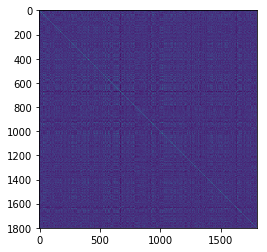

In [223]:
plt.imshow(SP.Graam)

In [224]:
il.reload(cl);

In [239]:
svm = cl.KSVM()
svm.train_fromK(SP.Graam, ytrain0, 0.001)

     pcost       dcost       gap    pres   dres
 0: -1.0441e+03 -1.2902e+03  2e+04  1e+01  4e-12
 1: -3.7146e+02 -1.1685e+03  2e+03  7e-01  4e-12
 2: -3.3843e+02 -5.8850e+02  3e+02  2e-16  1e-12
 3: -3.8972e+02 -4.3349e+02  4e+01  2e-16  1e-12
 4: -4.0409e+02 -4.1698e+02  1e+01  2e-16  1e-12
 5: -4.0779e+02 -4.1267e+02  5e+00  2e-16  1e-12
 6: -4.0904e+02 -4.1119e+02  2e+00  2e-16  1e-12
 7: -4.0963e+02 -4.1050e+02  9e-01  2e-16  1e-12
 8: -4.0991e+02 -4.1017e+02  3e-01  2e-16  1e-12
 9: -4.1001e+02 -4.1006e+02  5e-02  2e-16  1e-12
10: -4.1003e+02 -4.1004e+02  1e-02  2e-16  1e-12
11: -4.1004e+02 -4.1004e+02  8e-04  2e-16  2e-12
12: -4.1004e+02 -4.1004e+02  4e-05  2e-16  2e-12
Optimal solution found.


True

In [240]:
Kval = SP.compute_embedding(Xval0)

In [241]:
ypred0 = (svm.predict_fromK(Kval)*2)-1

In [242]:
u.accuracy(yval0, ypred0)

0.615